In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

X = pd.read_csv('/content/drive/MyDrive/unmon_features.csv')
y = -np.ones(len(X))

---
## 1. RF to get feature importance score

In [4]:
clf = RandomForestClassifier(n_estimators=20, criterion="entropy", max_depth=100, min_samples_split=2, max_features="sqrt", random_state=0)

In [5]:
clf.fit(X, y)
imp_score=clf.feature_importances_

In [15]:
top_indices=np.argsort(imp_score)[::-1][:10]
print(top_indices)
top_feature_names=[X.columns[int(x)] for x in top_indices]
print(top_feature_names)

[26 12  1  2  3  4  5  6  7  8]
['outpkt_count_burst', 'outpkt_avg', 'total_sum_dir', 'total_avg', 'inpkt_num', 'inpkt_avg', 'inpkt_sum', 'inpkt_num_frac_total', 'inpkt_avg_ordering', 'inpkt_std_ordering']


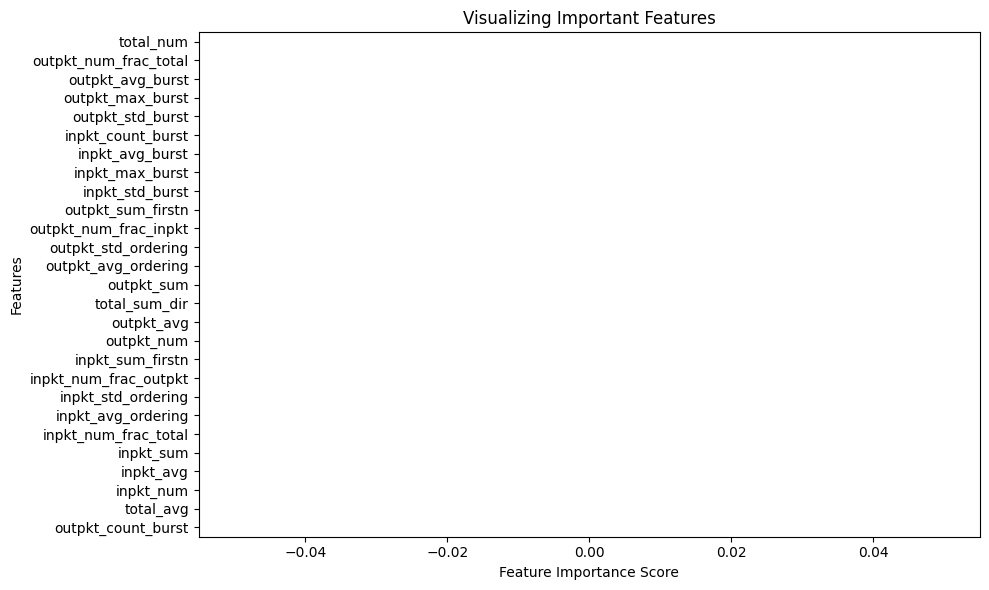

In [14]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout() 

---
## 2. Checking correlation & Feature selection

In [23]:
X = X[['outpkt_count_burst', 'outpkt_avg', 'total_sum_dir', 'total_avg', 'inpkt_num', 'inpkt_avg', 'inpkt_sum', 'inpkt_num_frac_total', 'inpkt_avg_ordering', 'inpkt_std_ordering']
]
X['label'] = -1

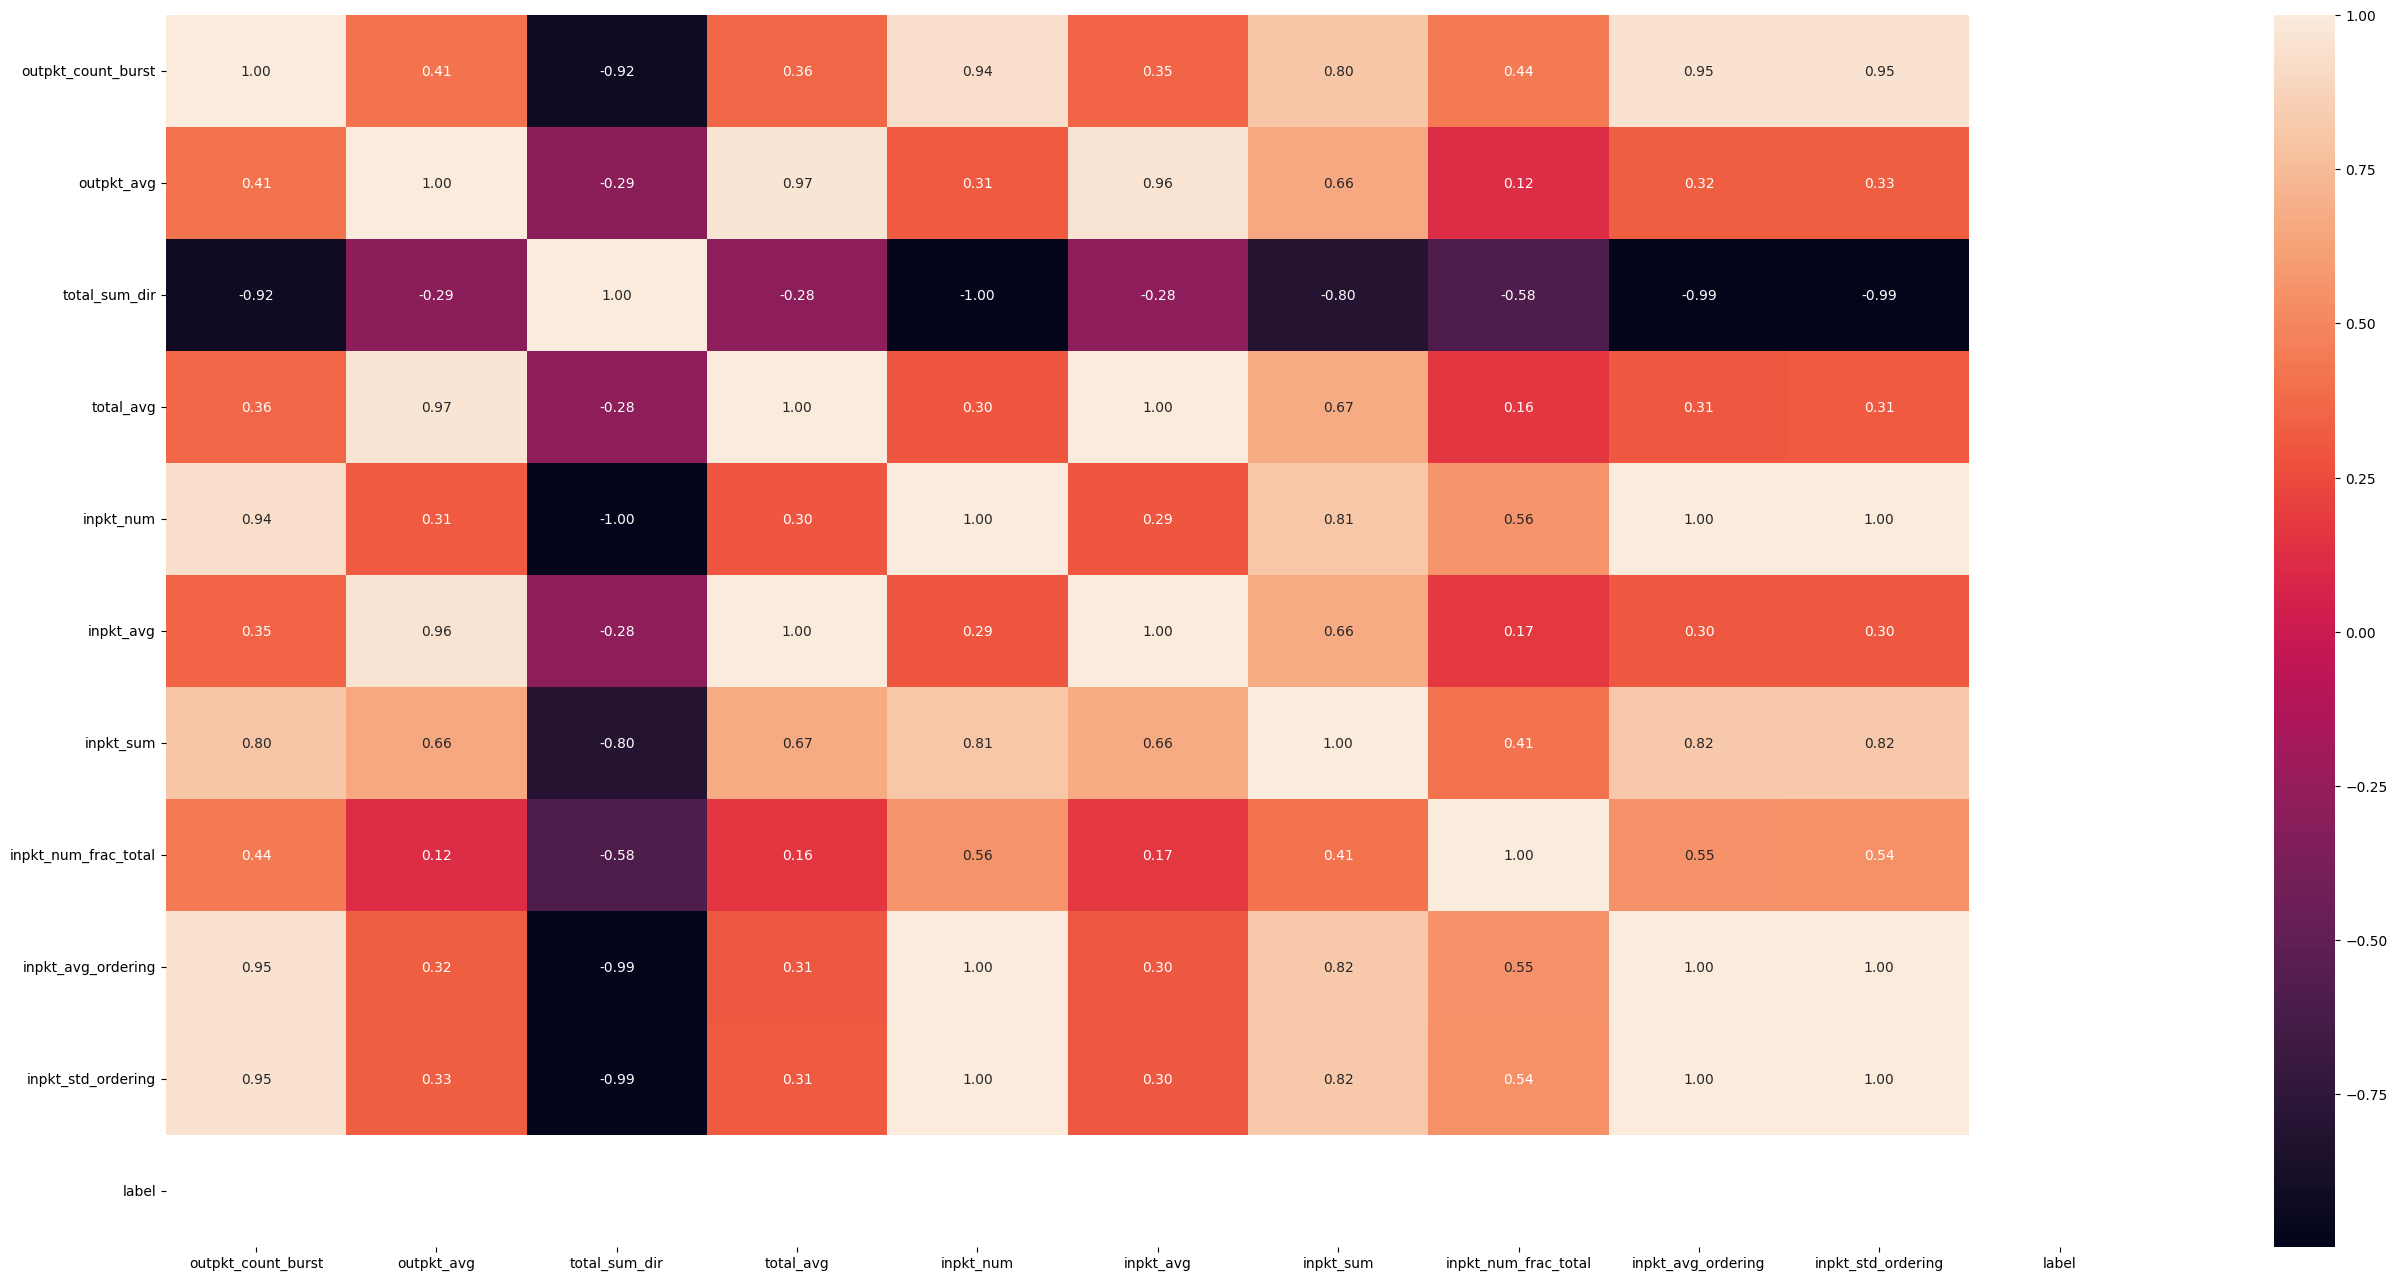

In [24]:
plt.figure(figsize=(32, 16))
corr = X.corr()
ax = sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [25]:
corr_y = abs(corr['outpkt_count_burst'])
cols = corr_y[corr_y>0.6]
print(cols)
print(cols.index)

outpkt_count_burst    1.000000
total_sum_dir         0.916048
inpkt_num             0.936926
inpkt_sum             0.800967
inpkt_avg_ordering    0.947408
inpkt_std_ordering    0.950683
Name: outpkt_count_burst, dtype: float64
Index(['outpkt_count_burst', 'total_sum_dir', 'inpkt_num', 'inpkt_sum',
       'inpkt_avg_ordering', 'inpkt_std_ordering'],
      dtype='object')


In [27]:
x = X[['outpkt_count_burst', 'total_sum_dir', 'inpkt_num', 'inpkt_sum',
       'inpkt_avg_ordering', 'inpkt_std_ordering']]
       
x

,outpkt_count_burst,total_sum_dir,inpkt_num,inpkt_sum,inpkt_avg_ordering,inpkt_std_ordering
0,17,-36864,101,411.35,72.465347,36.304696
1,387,-4326912,9189,91292.84,5052.770595,2845.096286
2,38,-108032,285,2710.95,184.996491,100.730751
3,366,-4539392,9407,71453.50,4991.069735,2855.784563
4,170,-984064,2215,22648.76,1256.969752,716.374241
...,...,...,...,...,...,...
9995,255,-1928704,4180,51667.78,2270.961722,1337.407077
9996,224,-2158592,4663,64021.68,2505.849024,1450.994832
9997,28,-124416,302,981.89,180.175497,101.241755
9998,56,-162304,413,2762.70,241.169492,138.848134


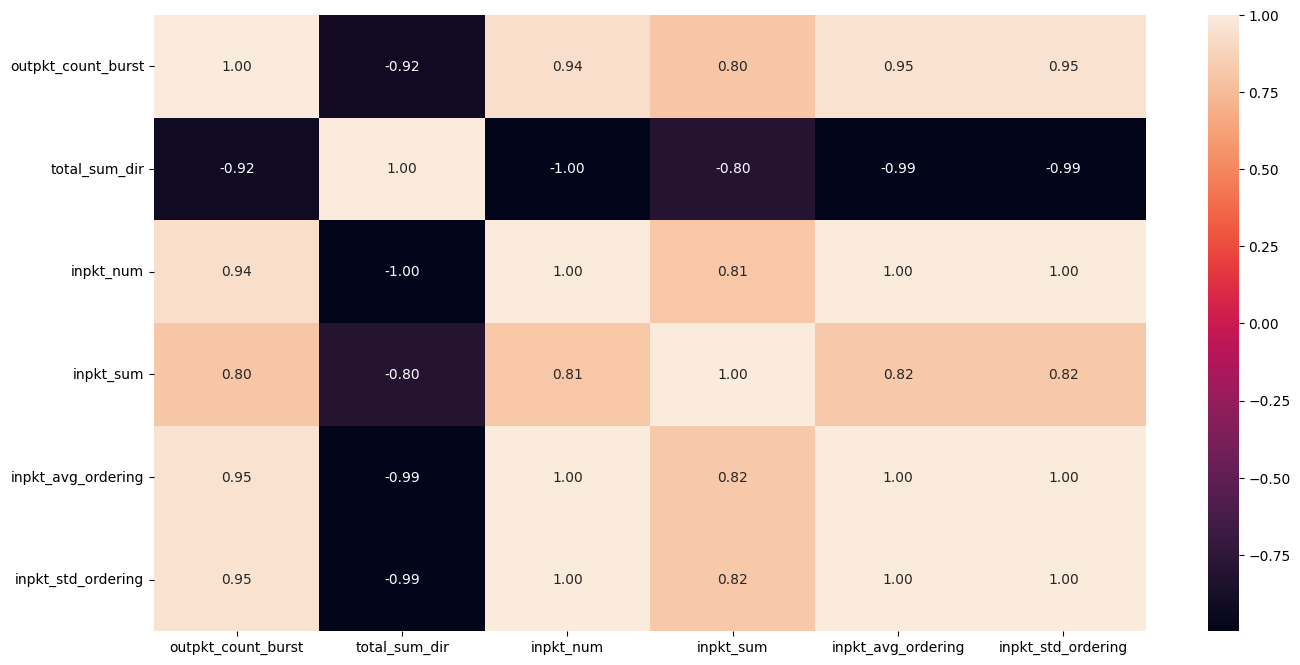

In [28]:
plt.figure(figsize=(16, 8))
ax = sns.heatmap(x.corr(), annot=True, fmt='.2f')
plt.show()